In [60]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy
import pandas as pd

In [61]:
n = 500
miu_0 = 1
miu_1 = 5
sigma_0 = 1
sigma_1 = np.sqrt(2)
pi_0 = 0.3
pi_1 = 0.7

In [62]:
y = np.random.binomial(1,pi_0, n)
X = y * (miu_0 + sigma_0 * np.random.randn(n)) + (1-y) * (miu_1 + sigma_1 * np.random.randn(n))

In [63]:
ran = np.linspace(-3, 8, 1000)
tmp = pi_0 * norm.pdf(ran, miu_0, sigma_0) + (1-pi_0) * norm.pdf(ran, miu_1, sigma_1)

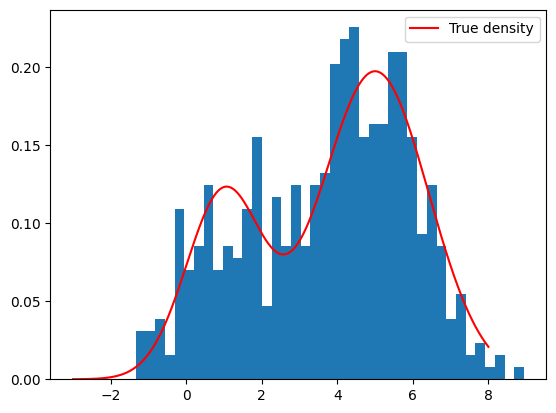

In [64]:
plt.hist(X, bins=40, density=True)
plt.plot(ran, tmp, color='r', label = "True density")
plt.legend()

In [65]:
gamma = pi_1 * scipy.stats.norm(5, np.sqrt(2)).pdf(X) / (pi_0 * scipy.stats.norm(1, 1).pdf(X) + pi_1 * scipy.stats.norm(5, np.sqrt(2)).pdf(X))

EM algorithm

In [66]:
X = pd.DataFrame(X)

In [67]:
def E(miu_0, miu_1, sigma_0, sigma_1, pi_0):
  pi_1 = 1 - pi_0
  return (pi_1 * norm(miu_1, sigma_1).pdf(X.loc[:,0])) / (pi_0 * norm(miu_0, sigma_0).pdf(X.loc[:,0]) + pi_1 * norm(miu_1, sigma_1).pdf(X.loc[:,0]))


In [68]:
def EM(x, theta_start=None):
    if not theta_start:
        miu_0 = 1
        miu_1 = 3
        sigma_0 = 1
        sigma_1 = 2
        pi_0 = 1/2
    else:
        miu_0, miu_1, sigma_0, sigma_1, pi_0 = theta_start
    for i in range(200):
        gamma = E(miu_0, miu_1, sigma_0, sigma_1, pi_0)
        miu_0 = np.sum((1-gamma)*X.loc[:,0]) / np.sum((1-gamma))
        miu_1 = np.sum(gamma*X.loc[:,0]) / np.sum(gamma)
        sigma_0 = np.sqrt(np.sum((1-gamma)*(X.loc[:,0] - miu_0)**2) / np.sum(1-gamma))
        sigma_1 = np.sqrt(np.sum(gamma*(X.loc[:,0] - miu_1)**2) / np.sum(gamma))
        pi_0 = np.sum(1-gamma)/gamma.shape[0]
        #pi_1 = np.sum(gamma)/gamma.shape[0]
    return miu_0, miu_1, sigma_0, sigma_1, pi_0

In [69]:
EM(X)

(1.0098660516337459,
 4.845267112942295,
 1.1317679507776675,
 1.3514054117746008,
 0.29576332387385085)

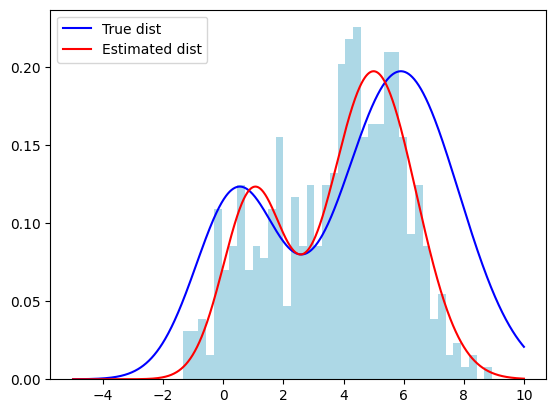

In [71]:
x_lin = np.linspace(-5, 10, 1000)
est = pi_0 * norm.pdf(x_lin, miu_0, sigma_0) + pi_1 * norm.pdf(x_lin, miu_1, sigma_1)
plt.plot(x_lin, tmp, label='True dist', color='blue')
plt.plot(x_lin, est, label='Estimated dist', color='r')
plt.hist(X, density=True, bins=40, color="lightblue")
plt.legend()
plt.show()